# 4.10: Coding etiquette and Excel reporting

### This script contains the following points:

### 1. Importing libraries
### 2. Importing data
### 3. Considering security implications of data
### 4. Creating 'Region' column and determining difference in spending habits
### 5. Creating exclusion flag for low-activity customers
### 6. Export sample data
### 7. Creating customer profiling
### 8. Creating and exporting visualisations showing the distribution of profiles
### 9. Aggregating the max, mean and min variables on a customer-profile level for usage frequency and expenditure
### 10. Comparing customer profiles with regions and departments and producing and exporting charts
### 11. Exporting final data set

#### 1. Importing libraries

In [146]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [147]:
# Create path

path = r'C:\Users\Lenad\Documents\Data Analytics Immersion\Achievement 4\Jupyter folder\Instacart basket analysis'

#### 2. Importing data

In [148]:
# Import cust_ords_prods

df_cust_ords_prods = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'cust_ords_prods.pkl'))

In [149]:
# Check imported dataframe

df_cust_ords_prods.shape

(32434212, 30)

In [150]:
df_cust_ords_prods.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income,...,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,avg_price,spending_flag,median_regularity,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,32,4,4.3,both,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,120,16,12.6,both,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,120,16,12.6,both,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,32,4,4.3,both,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,24,4,7.1,both,8,New customer,7.988889,Low spender,19.0,Regular customer


#### 3. Considering security implications of data

This data set contains personally identifiable information (PII) as it includes customers' first and last names. If this had happened in a working environment, I would inform a senior colleague or those responsible for data security. However, since that is not the case (and it is not advisable to simply delete the problematic columns), I will leave the data set as it is.

#### 4. Creating 'Region' column and determining difference in spending habits

In [151]:
# Create 'Region' column using region information from the U.S. Census Bureau

In [152]:
# Create 'Northeast' region

df_cust_ords_prods.loc[df_cust_ords_prods['state'].isin (['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

In [153]:
# Create 'Midwest' region

df_cust_ords_prods.loc[df_cust_ords_prods['state'].isin (['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

In [154]:
# Create 'South' region

df_cust_ords_prods.loc[df_cust_ords_prods['state'].isin (['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

In [155]:
# Create 'West' region

df_cust_ords_prods.loc[df_cust_ords_prods['state'].isin (['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [156]:
df_cust_ords_prods['region'].value_counts(dropna = False)

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [157]:
# Determine difference in spending habits beteen the different U.S. regions

In [158]:
region_spending_crosstab = pd.crosstab(df_cust_ords_prods['spending_flag'], df_cust_ords_prods['region'], dropna = False)

In [159]:
region_spending_crosstab

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,156129,108343,210182,160807
Low spender,7447681,5620004,10591428,8139638


Midwest - High spender = 2.1%, Low spender = 97.9%

Northeast - High spender = 1.9%, Low spender = 98.1%

South - High spender = 1.9%, Low spender = 98.1%

West - High spender = 1.9%, Low spender - 98.1%

There is very little difference in the proportion of high to low spenders in any of the regions. The region with the highest proportion of high to low spenders is the Midwest with 0.2% more high spenders than any of the other regions.

#### 5. Creating exclusion flag for low-activity customers

In [160]:
# Create exclusion flag for customers with fewer than 5 orders

df_cust_ords_prods.loc[df_cust_ords_prods['max_order'] <5, 'exclusion_flag'] = 'Exclude'

In [161]:
df_cust_ords_prods.loc[df_cust_ords_prods['max_order'] >= 5, 'exclusion_flag'] = 'Include'

In [162]:
df_cust_ords_prods['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Include    30992664
Exclude     1441548
Name: count, dtype: int64

In [163]:
# Create sample of low activity customers

df_cust_ords_prods_low = df_cust_ords_prods[df_cust_ords_prods['exclusion_flag'] == 'Exclude']

In [164]:
# Exclude low-activity customers from the dataframe

df_cust_ords_prods_no_low = df_cust_ords_prods[df_cust_ords_prods['exclusion_flag'] == 'Include']

In [165]:
df_cust_ords_prods_no_low.shape

(30992664, 32)

In [166]:
df_cust_ords_prods_no_low.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income,...,prices,_merge,max_order,loyalty_flag,avg_price,spending_flag,median_regularity,frequency_flag,region,exclusion_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,4.3,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,4.3,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,7.1,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include


#### 6. Export sample data

In [167]:
# Export sample data to pkl

df_cust_ords_prods_low.to_pickle(os.path.join(path, '02. Data','Prepared Data', 'cust_ords_prods_low.pkl'))

#### 7. Creating customer profiling

This section will require department names. In order to know which department is linked with which department id, I will import the department dataframe and merge it with df_cust_ords_prods_no_low. I will then rename the resulting dataframe to df_orders_products_all 

In [168]:
#Import df_departments

df_departments=pd.read_csv(os.path.join(path, '02. Data', 'Prepared data', 'departments_wrangled.csv'))

In [169]:
# Check imported dataframe

df_departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [170]:
# Rename Unnamed: 0 column to department
df_departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [171]:
# Check column rename

df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [172]:
# Merge df_departments and df_cust_ords_prods_no_low to create df_orders_products_all

df_orders_products_all = df_cust_ords_prods_no_low.merge(df_departments, on = 'department_id')

In [173]:
# Check dataframe

In [174]:
df_orders_products_all.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income,...,_merge,max_order,loyalty_flag,avg_price,spending_flag,median_regularity,frequency_flag,region,exclusion_flag,department
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include,produce
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include,dairy eggs
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include,dairy eggs
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include,produce
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include,produce


In [175]:
# Create profiling variable based on parental status

In [176]:
# Create 'Parent' profile based on 1 or more dependants

df_orders_products_all.loc[(df_orders_products_all['number_of_dependants'] >= 1), 'parental_status'] = 'Parent'

In [177]:
# Create 'No dependants' profile based on 0 number of dependants

df_orders_products_all.loc[(df_orders_products_all['number_of_dependants'] == 0), 'parental_status'] = 'No dependants'

In [178]:
df_orders_products_all['parental_status'].value_counts(dropna = False)

parental_status
Parent           23245632
No dependants     7747032
Name: count, dtype: int64

In [179]:
# Create profiling variable based on age and family status

In [180]:
# Check value counts for family status variable

df_orders_products_all['family_status'].value_counts()

family_status
married                             21763021
single                               5099271
divorced/widowed                     2647761
living with parents and siblings     1482611
Name: count, dtype: int64

In [181]:
# Create 'Child' profile

df_orders_products_all.loc[(df_orders_products_all['age'] <18) & (df_orders_products_all['family_status'] == 'living with parents and siblings'), 'marital_status'] = 'Child'

In [182]:
# Create 'Single young adult' profile

df_orders_products_all.loc[(df_orders_products_all['age'] >=18) & (df_orders_products_all['age'] <40) & (df_orders_products_all['family_status'] == 'single') | (df_orders_products_all['family_status'] == 'living with parents and siblings'), 'marital_status'] = 'Single young adult'

In [183]:
# Create 'Single older adult' profile

df_orders_products_all.loc[(df_orders_products_all['age'] >=40) & (df_orders_products_all['age'] <65) & (df_orders_products_all['family_status'] == 'single') | (df_orders_products_all['family_status'] == 'living with parents and siblings'), 'marital_status'] = 'Single older adult'

In [184]:
# Create 'Single elderly adult' profile

df_orders_products_all.loc[(df_orders_products_all['age'] >= 65) & (df_orders_products_all['family_status'] == 'single') | (df_orders_products_all['family_status'] == 'living with parents and siblings'), 'marital_status'] = 'Single elderly adult'

In [185]:
# Create 'Married young adult' profile

df_orders_products_all.loc[(df_orders_products_all['age'] >=18) & (df_orders_products_all['age'] <40) & (df_orders_products_all['family_status'] == 'married'), 'marital_status'] = 'Married young adult'

In [186]:
# Create 'Married older adult' profile

df_orders_products_all.loc[(df_orders_products_all['age'] >=40) & (df_orders_products_all['age'] <65) & (df_orders_products_all['family_status'] == 'married'), 'marital_status'] = 'Married older adult'

In [187]:
# Create 'Married elderly adult' profile

df_orders_products_all.loc[(df_orders_products_all['age'] >= 65) & (df_orders_products_all['family_status'] == 'married'), 'marital_status'] = 'Married elderly adult'

In [188]:
# Create 'Divorced or widowed young adult' profile

df_orders_products_all.loc[(df_orders_products_all['age'] >=18) & (df_orders_products_all['age'] <40) & (df_orders_products_all['family_status'] == 'divorced/widowed'), 'marital_status'] = 'Divorced or widowed young adult'

In [189]:
# Create 'Divorced or widowed older adult' profile

df_orders_products_all.loc[(df_orders_products_all['age'] >=40) & (df_orders_products_all['age'] <65) & (df_orders_products_all['family_status'] == 'divorced/widowed'), 'marital_status'] = 'Divorced or widowed older adult'

In [190]:
# Create 'Divorced or widowed elderly adult' profile

df_orders_products_all.loc[(df_orders_products_all['age'] >= 65) & (df_orders_products_all['family_status'] == 'divorced/widowed'), 'marital_status'] = 'Divorced or widowed elderly adult'

In [191]:
df_orders_products_all['marital_status'].value_counts(dropna = False)

marital_status
Married older adult                  9055095
Married young adult                  6529093
Married elderly adult                6178833
Single young adult                   2662946
Single older adult                   2436325
Divorced or widowed elderly adult    2023913
Single elderly adult                 1482611
Divorced or widowed older adult       623848
Name: count, dtype: int64

In [192]:
# Create profiling variable based on income

In [193]:
# Create 'Low earner' profile

df_orders_products_all.loc[(df_orders_products_all['income'] <50000), 'income_status'] = 'Low earner'

In [194]:
# Create 'Middle earner' profile

df_orders_products_all.loc[(df_orders_products_all['income'] >=50000) & (df_orders_products_all['income'] <150000), 'income_status'] = 'Middle earner'

In [195]:
# Create 'High earner' profile

df_orders_products_all.loc[(df_orders_products_all['income'] >= 150000), 'income_status'] = 'High earner'

In [196]:
df_orders_products_all['income_status'].value_counts(dropna = False)

income_status
Middle earner    23727864
High earner       3898651
Low earner        3366149
Name: count, dtype: int64

#### 8. Creating and exporting visualisations showing the distribution of profiles

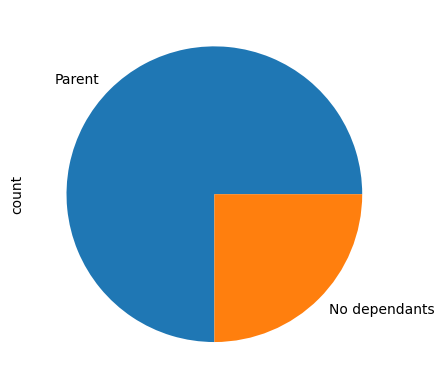

In [197]:
# Create pie chart for 'parental status' profiles

parental_status_pie = df_orders_products_all['parental_status'].value_counts().plot.pie(color =['blue','green'])

In [198]:
# Export Parental Status pie chart

parental_status_pie.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'parental_status_pie.png'))

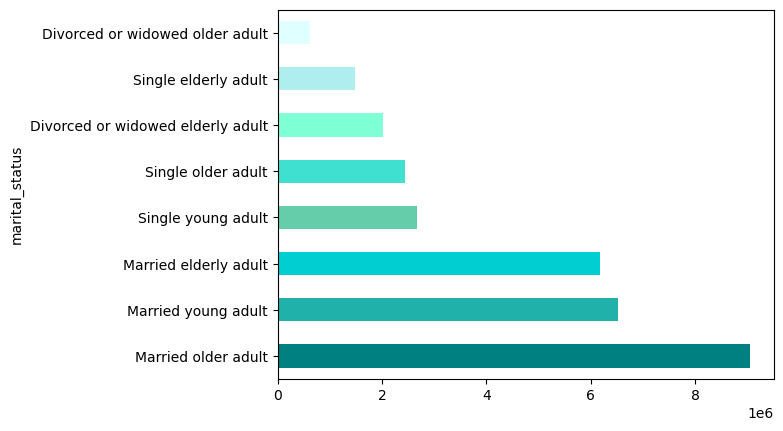

In [199]:
# Create horizontal bar chart for 'marital status' profiles

marital_status_bar = df_orders_products_all['marital_status'].value_counts().plot.barh(color =['teal', 'lightseagreen', 'darkturquoise','mediumaquamarine','turquoise', 'aquamarine', 'paleturquoise', 'lightcyan'])

In [200]:
# Export Marital Status horizontal bar chart

marital_status_bar.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'marital_status_barh.png'))

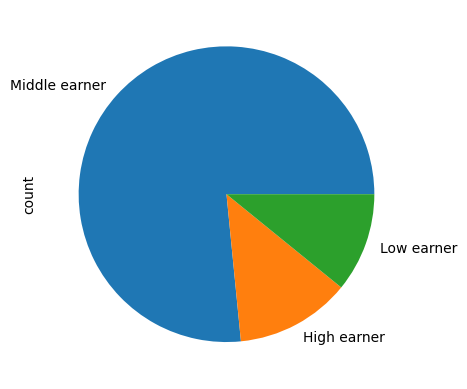

In [201]:
# Create pie chart for 'income status' profiles

income_status_pie = df_orders_products_all['income_status'].value_counts().plot.pie(color =['lightblue', 'blue', 'darkblue'])

In [202]:
# Export Income Status pie chart

income_status_pie.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'income_status_pie.png'))

#### 9. Aggregating the max, mean and min variables on a customer-profile level for usage frequency and expenditure

In [203]:
#Aggregate the mean, min and max variables of the 'parental status' customer profile group

df_orders_products_all.groupby('parental_status').agg({'days_since_last_order': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})

days_since_last_order               prices           
                                 mean  min   max      mean  min   max
parental_status                                                      
No dependants               10.791750  0.0  30.0  7.794471  1.0  25.0
Parent                      10.816612  0.0  30.0  7.795591  1.0  25.0

The 'Parent' and 'No dependants' groups had a similar mean, min and max variables for usage frequency and expenditure.

In [204]:
#Aggregate the mean, min and max variables of the marital status customer profile group

df_orders_products_all.groupby('marital_status').agg({'days_since_last_order': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})

days_since_last_order               prices  \
                                                   mean  min   max      mean   
marital_status                                                                 
Divorced or widowed elderly adult             10.768604  0.0  30.0  7.807195   
Divorced or widowed older adult               10.691868  0.0  30.0  7.802117   
Married elderly adult                         10.799910  0.0  30.0  7.799463   
Married older adult                           10.857792  0.0  30.0  7.796616   
Married young adult                           10.790296  0.0  30.0  7.788183   
Single elderly adult                          10.750739  0.0  30.0  7.805819   
Single older adult                            10.722408  0.0  30.0  7.793852   
Single young adult                            10.896280  0.0  30.0  7.783576   

                                              
                                   min   max  
marital_status                                
Divorced or widowed elderly adult  1.0  25.0  
Divorced or widowed older adult    1.0  25.0  
Married elderly adult              1.0  25.0  
Married older adult                1.0  25.0  
Married young adult                1.0  25.0  
Single elderly adult               1.0  25.0  
Single older adult                 1.0  25.0  
Single young adult                 1.0  25.0

There appears to be little difference between each of the profile groups in regards to the mean, min and max usage frequency and expenditure.

In [205]:
#Aggregate the mean, min and max variables of the income status customer profile group

df_orders_products_all.groupby('income_status').agg({'days_since_last_order': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})

days_since_last_order               prices           
                               mean  min   max      mean  min   max
income_status                                                      
High earner               10.684286  0.0  30.0  7.945288  1.0  25.0
Low earner                11.175710  0.0  30.0  6.713149  1.0  25.0
Middle earner             10.779563  0.0  30.0  7.924219  1.0  25.0

While there is little difference between the min and max usage frequency and expenditure of all groups and the mean of the High and Middle earner groups, the Low earner group has a higher mean value for both usage frequency and expenditure. This would indicate that this group leaves it slightly longer between orders and spends less when an order is placed.

#### 10. Comparing customer profiles with regions and departments and producing and exporting charts

In [206]:
# Compare parental status customer profile across regions

parental_status_crosstab = pd.crosstab(df_orders_products_all['parental_status'], df_orders_products_all['region'], dropna = False)

In [207]:
parental_status_crosstab

region,Midwest,Northeast,South,West
parental_status,,,,
No dependants,1824487,1355828,2584352,1982365
Parent,5443220,4114240,7736110,5952062


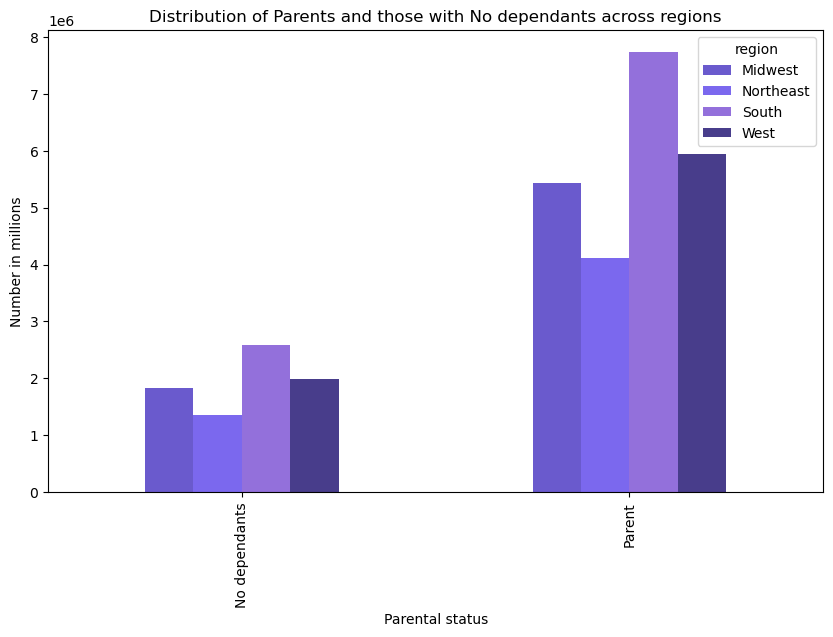

In [208]:
# Create and export bar chart to show regional spending by parental status

parental_status_crosstab.plot(kind='bar', figsize=(10, 6), color =('slateblue', 'mediumslateblue', 'mediumpurple', 'darkslateblue'))
plt.title('Distribution of Parents and those with No dependants across regions')
plt.xlabel('Parental status')
plt.ylabel('Number in millions')
plt.savefig(os.path.join(path, '04. Analysis','Visualisations', 'parental_status_crosstab_region_bar.png'))

Each group within this profile has a higher number of parents to non-parents. There is no real difference proportionally between the regions.

In [209]:
# Compare marital status customer profile across regions

marital_status_crosstab = pd.crosstab(df_orders_products_all['marital_status'], df_orders_products_all['region'], dropna = False)

In [210]:
marital_status_crosstab

region,Midwest,Northeast,South,West
marital_status,,,,
Divorced or widowed elderly adult,470474,379229,658284,515926
Divorced or widowed older adult,147239,100015,219744,156850
Married elderly adult,1434998,1107035,2052546,1584254
Married older adult,2139342,1604202,2978566,2332985
Married young adult,1517188,1146220,2199093,1666592
Single elderly adult,351692,256783,505905,368231
Single older adult,590388,406033,799857,640047
Single young adult,616386,470551,906467,669542


Married people between the ages of 40 and 65 make up the largest group across all regions. The smallest group shown across all regions is Divorced or widowed adults between the ages of 40 and 65. There appears to be no data for children and divorced or widowed young adults.

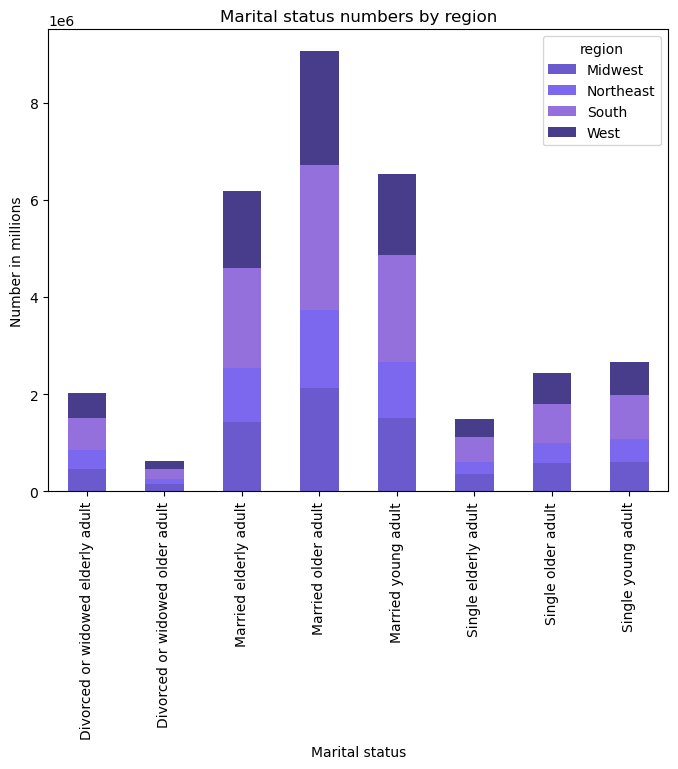

In [211]:
# Create and export stacked bar chart to show regional spending by marital status

marital_status_crosstab.plot(kind='bar', stacked = True, figsize=(8, 6), color =('slateblue', 'mediumslateblue', 'mediumpurple', 'darkslateblue'))
plt.title('Marital status numbers by region')
plt.xlabel('Marital status')
plt.ylabel('Number in millions')
plt.savefig(os.path.join(path, '04. Analysis','Visualisations', 'marital_status_crosstab_region_stacked_bar.png'))

In [212]:
# Compare income status customer profile across regions

income_status_crosstab = pd.crosstab(df_orders_products_all['income_status'], df_orders_products_all['region'], dropna = False)

In [213]:
income_status_crosstab

region,Midwest,Northeast,South,West
income_status,,,,
High earner,918287,678361,1291629,1010374
Low earner,784517,587850,1143857,849925
Middle earner,5564903,4203857,7884976,6074128


Middle earners form the largest group by far across all regions. Each region has higher numbers of High earners compared to Low earners, but the gap between them is most pronounced in the West region.

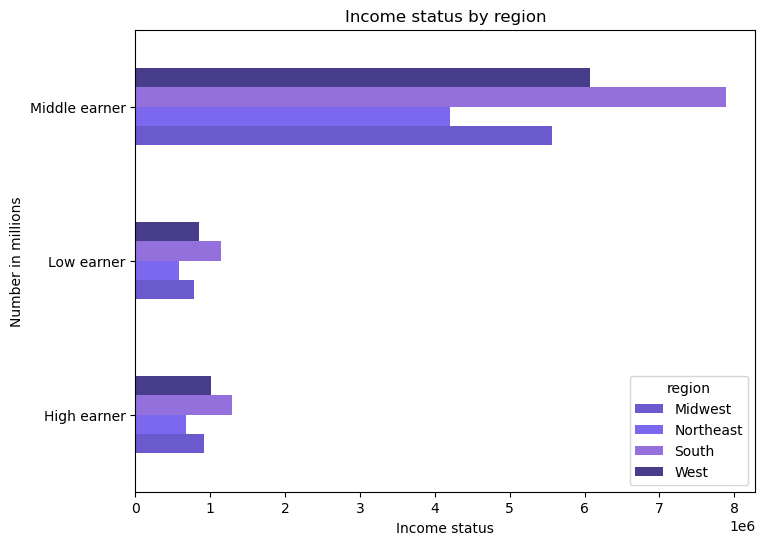

In [214]:
# Create and export horizontal bar chart to show regional spending by income status

income_status_crosstab.plot(kind='barh', figsize=(8, 6), color =('slateblue', 'mediumslateblue', 'mediumpurple', 'darkslateblue'))
plt.title('Income status by region')
plt.xlabel('Income status')
plt.ylabel('Number in millions')
plt.savefig(os.path.join(path, '04. Analysis','Visualisations', 'income_status_region_crosstab_barh.png'))

In [215]:
# Discover in which departments most money is spent at a regional level

region_department_crosstab = pd.crosstab(df_orders_products_all['department'], df_orders_products_all['region'], dropna = False)

In [216]:
region_department_crosstab

region,Midwest,Northeast,South,West
department,,,,
alcohol,34052,25034,48822,36766
babies,95741,72712,139511,102428
bakery,262614,200136,373055,289221
beverages,598990,462931,859435,650578
breakfast,157781,119327,225539,175448
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1215821,917293,1727823,1330891
deli,234464,178398,333620,257352


The most popular department across all regions is Produce, followed by Dairy/Eggs and Snacks.

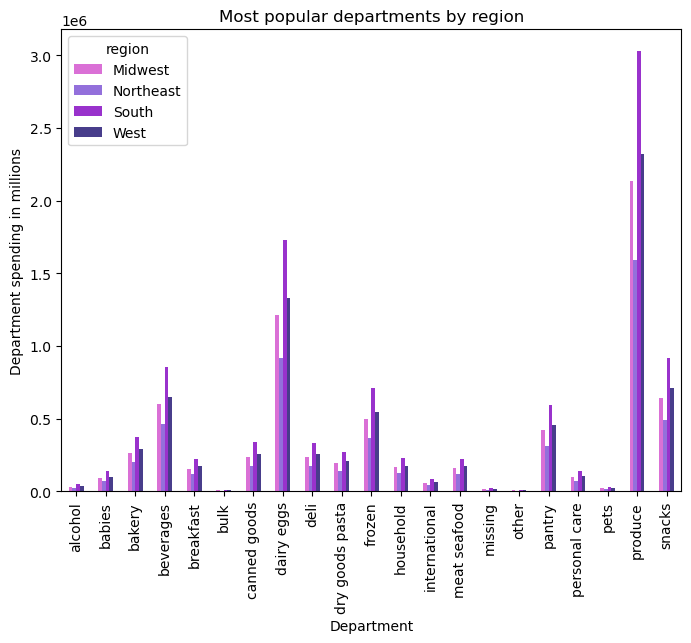

In [217]:
# Create and export bar chart to show department spending by region

region_department_crosstab.plot(kind='bar', figsize=(8, 6), color =('orchid', 'mediumpurple', 'darkorchid', 'darkslateblue'))
plt.title('Most popular departments by region')
plt.xlabel('Department')
plt.ylabel('Department spending in millions')
plt.savefig(os.path.join(path, '04. Analysis','Visualisations', 'region_department_crosstab_bar.png'))

In [218]:
# Discover in which departments most money is spent depending on parental status

parental_status_department_crosstab = pd.crosstab(df_orders_products_all['department'], df_orders_products_all['parental_status'], dropna = False)

In [219]:
parental_status_department_crosstab

parental_status,No dependants,Parent
department,,
alcohol,36852,107822
babies,103328,307064
bakery,282486,842540
beverages,645349,1926585
breakfast,168325,509770
bulk,8000,25451
canned goods,251020,761054
dairy eggs,1298215,3893613
deli,253382,750452


As with the different regions, the most popular departments with both Parents and those with No dependants are Produce, Dairy/Eggs and Snacks.

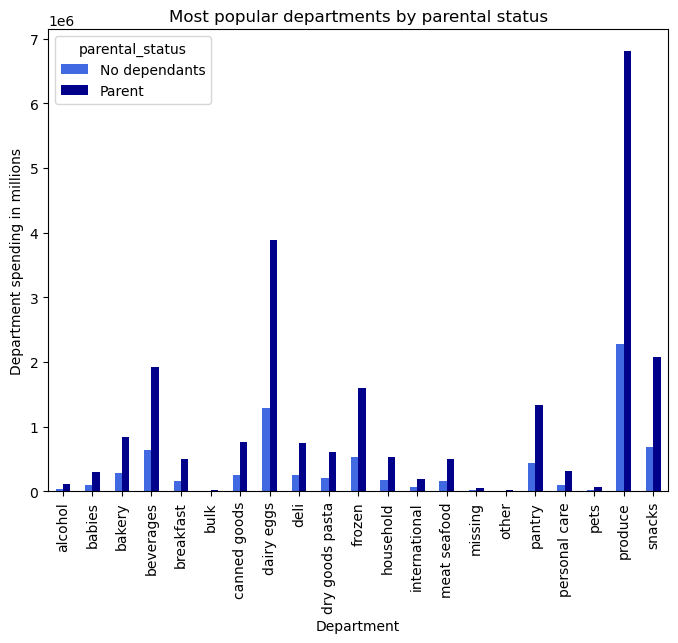

In [220]:
# Create and export bar chart to show department spending by parental status
parental_status_department_crosstab.plot(kind='bar', figsize=(8, 6), color =('royalblue', 'darkblue'))
plt.title('Most popular departments by parental status')
plt.xlabel('Department')
plt.ylabel('Department spending in millions')
plt.savefig(os.path.join(path, '04. Analysis','Visualisations', 'parental_status_department_crosstab_bar.png'))

In [221]:
region_department_crosstab

region,Midwest,Northeast,South,West
department,,,,
alcohol,34052,25034,48822,36766
babies,95741,72712,139511,102428
bakery,262614,200136,373055,289221
beverages,598990,462931,859435,650578
breakfast,157781,119327,225539,175448
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1215821,917293,1727823,1330891
deli,234464,178398,333620,257352


In [222]:
# Discover in which departments most money is spent depending on marital status

marital_status_department_crosstab = pd.crosstab(df_orders_products_all['department'], df_orders_products_all['marital_status'], dropna = False)

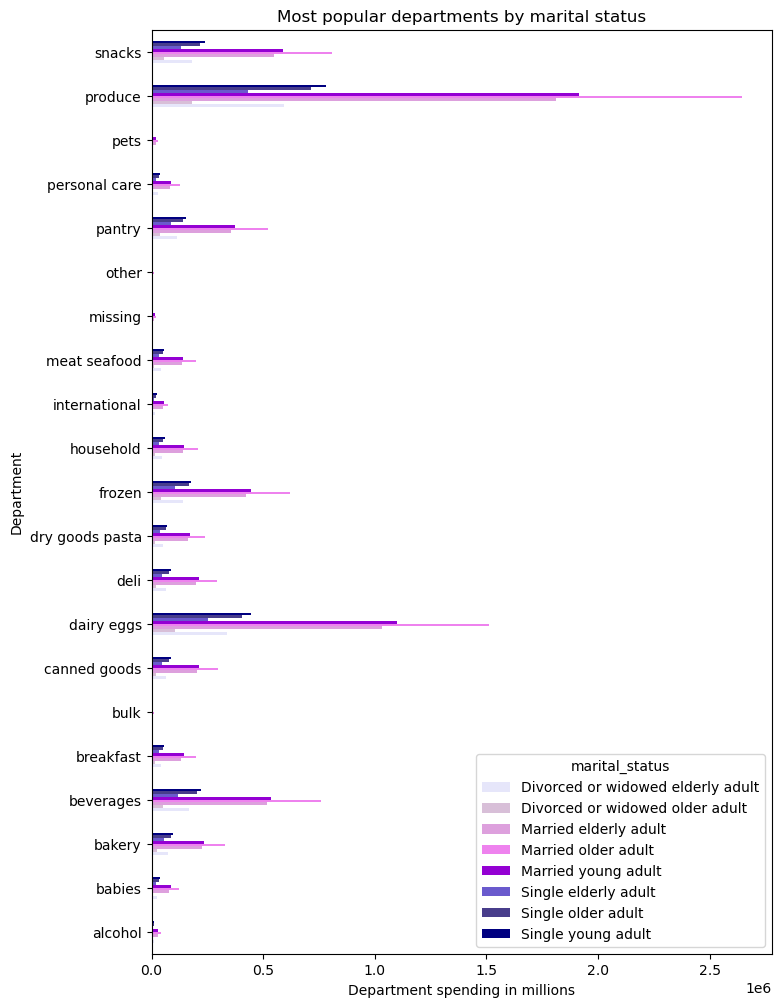

In [223]:
# Create and export horizontal bar chart to show department spending by marital status

marital_status_department_crosstab.plot(kind='barh', figsize=(8, 12), color =('lavender', 'thistle', 'plum', 'violet', 'darkviolet', 'slateblue', 'darkslateblue', 'navy'))
plt.title('Most popular departments by marital status')
plt.xlabel('Department spending in millions')
plt.ylabel('Department')
plt.savefig(os.path.join(path, '04. Analysis','Visualisations', 'marital_status_department_crosstab_bar.png'))

There is no difference in the most popular departments when split by marital status.

In [224]:
# Discover in which departments most money is spent depending on income status

income_status_department_crosstab = pd.crosstab(df_orders_products_all['department'], df_orders_products_all['income_status'], dropna = False)

In [225]:
income_status_department_crosstab

income_status,High earner,Low earner,Middle earner
department,,,
alcohol,24081,18050,102543
babies,53001,29240,328151
bakery,148862,108186,867978
beverages,313382,383123,1875429
breakfast,84199,92308,501588
bulk,3671,4676,25104
canned goods,132414,78975,800685
dairy eggs,661137,503429,4027262
deli,125893,106448,771493


Uniquely in my analysis of department spending thus far, while Produce and Dairy/Eggs remain the top 2 departments across all income groups, the third most popular group for High earners is Beverages

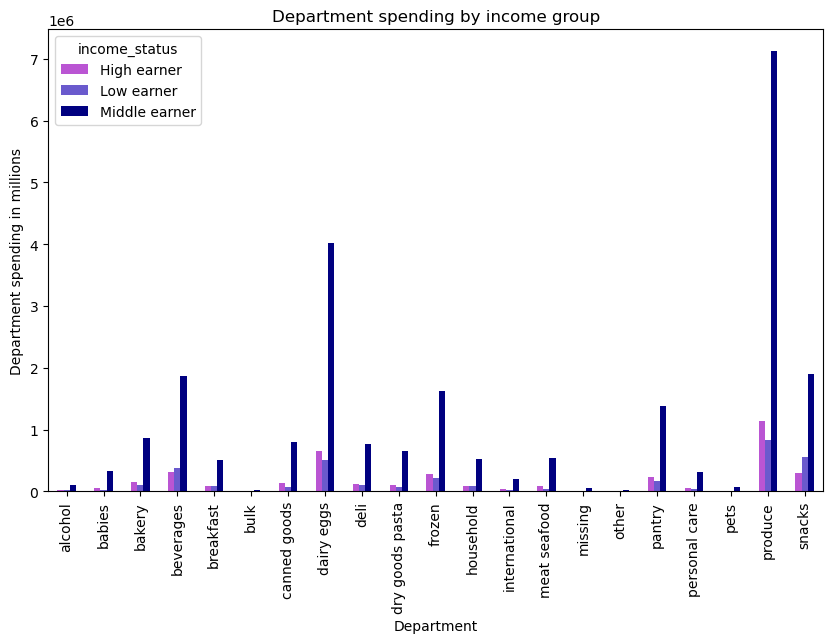

In [226]:
# Create and export bar chart to show department spending by income status

income_status_department_crosstab.plot(kind='bar', figsize=(10, 6), color=('mediumorchid', 'slateblue', 'navy'))
plt.title('Department spending by income group')
plt.xlabel('Department')
plt.ylabel('Department spending in millions')
plt.savefig(os.path.join(path, '04. Analysis','Visualisations', 'income_status_department_crosstab_bar.png'))

#### 11. Exporting final data set

In [227]:
# Export data to pkl

df_orders_products_all.to_pickle(os.path.join(path, '02. Data','Prepared Data', 'df_orders_products_all.pkl'))